In [3]:
import pandas as pd # to cleaning the table
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import numpy as np # work with Nan var
import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import time
print('Libraries imported.')

Libraries imported.


# Collecting Toronto neighbourhoods cordinations
base on https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto there is Toronto's neighbourhoods

In [280]:
neighbourhoods=["Agincourt", "Alderwood", "Alexandra Park", "Amesbury", "Armadale", "Armour Heights", "Baby Point", "Baldwin Village", "Bathurst Manor", "Bayview Village",
    "Bayview Woods – Steeles", "Bedford Park", "Bendale", "Bermondsey", "Birch Cliff", " Birch Cliff Heights", "Black Creek", "Bloor West Village",
    "Bracondale Hill", "Briar Hill–Belgravia", "The Bridle Path", "Brockton Village", "Brown's Corners", "Cabbagetown", "Carleton Village", "Casa Loma",
    "Chaplin Estates", "Chinatown", "Church and Wellesley", "CityPlace", "Clairlea", "Clairville", "Clanton Park", "Cliffcrest", "Cliffside", "Corktown",
    "Corso Italia", "Crescent Town", "Davenport", "Davisville Village", "Deer Park", "Discovery District", "Distillery District", "Don Mills",
    "Don Valley Village", "Dorset Park", "Dovercourt Park", "Downsview", "Dufferin Grove", "Earlscourt", "East Bayfront", "East Danforth", "Eatonville",
    "Eglinton East", "Eglinton West", "Centennial Park", "Eringate", "Fairbank", "Fashion District", "Financial District", "Flemingdon Park", "Forest Hill",
    "Fort York", "Garden District", "Gerrard Street East", "Glen Park", "Golden Mile", "Governor's Bridge", "Grange Park", "Greektown", "Guildwood",
    "Harbord Village", "Harbourfront", "Henry Farm", "High Park", "Highland Creek", "Hillcrest Village", "Hoggs Hollow", "Humber Heights – Westmount",
    "Humber Summit", "Humber Valley Village", "Humbermede", "Humberwood", "Humewood–Cedarvale", "Ionview", "Islington–City Centre West", "Jane and Finch",
    "Junction Triangle", "Kensington Market", "Kingsview Village", "Koreatown", "L'Amoreaux", "Lambton", "Lansing", "Lawrence Heights", "Lawrence Manor",
    "Lawrence Park", "Leaside", "Ledbury Park", "Leslieville", "Liberty Village", "Little Italy", "Little Japan", "Beaconsfield Village", "Little Portugal",
    "Little Tibet", "Long Branch", "Lytton Park", "Main Square", "Malvern", "Maple Leaf", "Markland Wood", "Maryvale", "Midtown", "Milliken", "Mimico",
    "Moore Park", "Morningside Heights", "Morningside", "Moss Park", "Mount Dennis", "New Toronto", "Newtonbrook", "Niagara", "North Toronto",
    "North York City Centre", "O'Connor–Parkview", "Oakridge", "Oakwood–Vaughan", "Broadview North", "Old Mill", "Old Town", "Mirvish Village", "Palmerston",
    "Pape Village", "Parkdale", "Parkway Forest", "Parkwoods", "Pelmo Park – Humberlea", "Playter Estates", "Pleasant View", "Port Lands", "Port Union",
    "Princess Gardens", "Quayside", "Queen Street West", "Regent Park", "Rexdale", "Richview", "Riverdale", "Rockcliffe–Smythe", "Roncesvalles", "Rosedale",
    "Rouge", "Runnymede", "Scarborough City Centre", "Scarborough Junction", "Scarborough Village", "Seaton Village", "Silverthorn", "Smithfield", "South Core",
    "South Hill", "St. James Town", "St. Lawrence", "Steeles", "Stonegate-Queensway", "Summerhill", "Sunnylea", "Swansea", "Tam O'Shanter – Sullivan",
    "The Annex", "The Beaches", "The Elms", "The Junction", "The Kingsway", "The Peanut", "Humber Bay", "Thistletown", "Thorncliffe Park", "Thorncrest Village",
    "The Entertainment District", "Toronto Islands", "Trefann Court", "Trinity–Bellwoods", "University", "Upper Beaches", "Uptown Toronto", "Victoria Village",
    "Wallace Emerson", "Wanless Park", "West Deane Park", "West Hill", "West Humber-Clairville", "West Rouge", "Westminster–Branson", "Weston", "Wexford",
    "Willowdale", "Willowridge", "Woburn", "Woodbine Heights", "Wychwood Park", "Yonge–Eglinton", "York Mills", "York University Heights", "Tichester",
    "Yorkville"]
lat_long_dict={}

## Get neighbourhoods cordinations

In [ ]:
def push_lat_long(address):
#     address = '102 North End Ave, New York, NY'
    geolocator = Nominatim(user_agent="my-applications")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return [latitude, longitude]


for i in neighbourhoods:
    try:
        lat_long_dict[i]=push_lat_long(i+', toronto, canada')
        print (i +'--> '+ str(lat_long_dict[i]))
    except:
        if '(' in i:
            try:
                i=i.split('(')[1].split(')')[0]
                lat_long_dict[i]=push_lat_long(i+', toronto, canada')
                print (i +'--> '+ str(lat_long_dict[i]))
            except:
                 print (i +'--> null')
                 lat_long_dict[i]=[0,0]
        else:
            print (i +'--> null')
            lat_long_dict[i]=[0,0]

In [284]:
locations=pd.DataFrame(lat_long_dict)
locations=locations.T
locations.columns=['lat','long']
locations=locations.drop_duplicates(['lat','long'],keep='first')
locations=locations[locations['long']!=0]

In [ ]:
# geolocator couldn't get these cordinations or they were wrong!

Missed_locations={"Clairville":[43.746805, -79.621936],
"Greektown":[43.683379, -79.323574],
"Eringate – Centennial – West Deane":[43.660034, -79.580461],
"Briar Hill-Belgravia":[43.705813, -79.453183],
"Forest Hill North":[43.704415, -79.427474],
"Forest Hill South":[43.696716, -79.411792],
"High Park":[43.647037, -79.463118],
"High Park North":[43.659111, -79.465533],
"Humewood–Cedarvale":[43.692896, -79.427634],
"Glenfield-Jane Heights":[43.750404, -79.510863],
"Kingsview Village-The Westway":[43.700271, -79.552088],
"Newtonbrook East":[43.793917, -79.396515],
"Newtonbrook West":[43.785808, -79.436860],
"North Toronto":[43.716180, -79.399352],
"Parkwoods–Donalda":[43.753880, -79.324015],
"Playter Estates":[43.679058, -79.357626],
"Princess-Rosethorn":[43.667295, -79.541835],
"Rexdale":[43.728940, -79.584566],
"The Elms":[43.721674, -79.548354],
"Rockcliffe–Smythe":[43.676433, -79.488185],
"Rouge":[43.804700, -79.165745],
"Smithfield":[43.744051, -79.591251],
"Thistletown - Beaumond Heights":[43.743144, -79.571332],
"Toronto waterfront":[43.641834, -79.377910],
"Westminster–Branson":[43.780025, -79.450367],
"Weston-Pellam Park":[43.671255, -79.457095],
"Willowdale":[43.771363, -79.419308],
"Woodbine Corridor":[43.692666, -79.309814]}


In [ ]:
added_cord=pd.DataFrame(Missed_locations)
added_cord=added_cord.T
added_cord.columns=['lat','long']
locations=pd.concat([locations,added_cord])
locations.to_csv('Toronto_Neighbourhoods.csv')

# Read From Attched CSV File
You can prepear the csv file by above. I also attached the Csv File to not repeat above process

In [5]:
df=pd.read_csv('Toronto_Neighbourhoods.csv')

In [6]:
df.head()

,Borough,neighborhood,lat,long
0,downTown,Alexandra Park,43.650758,-79.404298
1,downTown,Baldwin Village,43.669818,-79.497172
2,downTown,Bedford Park,43.737388,-79.410925
3,downTown,Bloor West Village,43.649318,-79.484436
4,downTown,Bracondale Hill,43.676125,-79.428000


# Get Neighbourhoods
 Etobicoke,  Scarborough, North York, Downtown Toronto, Central Toronto, West Toronto, York,  East Toronto, East York, Mississauga 

In [7]:
# got id from https://foursquare.com/developers/apps
#CLIENT_ID = 'G5MJSGEHGMC3PIAZT3GOI2AZ4JBJBN3PSV1R0HWB0RTLXJ3Q' # your Foursquare ID
#CLIENT_SECRET = '0JCK4QBOBMLSEF1ESBHLFCNOKHM0NLQSTLUGQACASBPE4KRE' # your Foursquare Secret
# my id:
CLIENT_ID = 'XVYFHI1R31JB05AS3O4OUROJ0DBXFKP52LK05V3IXVQGCT1Z' # your Foursquare ID
CLIENT_SECRET = 'FS5VKJC4O1VN2QGMVROEFFIMCK0QEFUMS4T4V0JDWO1WNDNA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=10000

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
        time.sleep(1)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        #print(url)   
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
venues = getNearbyVenues(names=df['neighborhood'],
                                   latitudes=df['lat'],
                                   longitudes=df['long']
                                  )

In [16]:
# Write the result to have offline data
pd.to_pickle(venues,'GTA_venues.p')
print('There are {} venues in GTA.'.format(venues.shape[0]))
venues.head()

There are 19204 venues in GTA.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alexandra Park,43.650758,-79.404298,Porchetta & Co.,43.651576,-79.408950,Sandwich Place
1,Alexandra Park,43.650758,-79.404298,Kid Icarus,43.653933,-79.401719,Arts & Crafts Store
2,Alexandra Park,43.650758,-79.404298,Seven Lives - Tacos y Mariscos,43.654418,-79.400545,Mexican Restaurant
3,Alexandra Park,43.650758,-79.404298,Tequila Bookworm,43.647697,-79.401549,Bar
4,Alexandra Park,43.650758,-79.404298,Campagnolo,43.651600,-79.409599,Italian Restaurant


In [17]:
venues.to_csv ('venues.csv')

In [15]:
venues=pd.read_pickle('GTA_venues.p')

In [16]:
# Choose nearest neighborhood
## calculateing distence of venue and center of neighborhood
venues['dist']=((venues['Neighborhood Latitude']-venues['Venue Latitude'])**2+(venues['Neighborhood Longitude']-venues['Venue Longitude'])**2)**0.5
venues=venues.sort_values(['Venue','dist'])
## Removing the duplicated venues with larger distense
venues=venues.drop_duplicates(['Venue','Venue Latitude','Venue Longitude','Venue Category'],keep='first')
venues.drop('dist',inplace=True,axis=1)

In [17]:
Toronto_borough={
    "Downtown": ["Alexandra Park", "The Annex", "Baldwin Village", "Cabbagetown", "CityPlace", "Chinatown", "Church and Wellesley", "Corktown",
        "Discovery District", "Distillery District", "The Entertainment District", "East Bayfront", "Fashion District", "Financial District",
        "Garden District", "Grange Park", "Harbord Village", "Harbourfront", "Kensington Market", "Little Japan", "Moss Park", "Old Town", "Quayside",
        "Queen Street West", "Regent Park", "South Core", "St. James Town", "St. Lawrence", "Toronto Islands", "Trefann Court", "University", "Yorkville",
        "The Beaches", "East Danforth", "Gerrard Street East", "Greektown", "Leslieville", "Main Square", "Playter Estates", "Port Lands", "Riverdale",
        "Upper Beaches", "Bedford Park", "Casa Loma", "Chaplin Estates", "Davisville Village", "Deer Park", "Forest Hill", "Lawrence Park", "Lytton Park",
        "Midtown", "Moore Park", "North Toronto", "Rosedale", "South Hill", "Summerhill", "Wanless Park", "Wychwood Park", "Yonge–Eglinton",
        "Beaconsfield Village", "Bloor West Village", "Bracondale Hill", "Brockton Village", "Carleton Village", "Corso Italia", "Davenport",
        "Dovercourt Park", "Dufferin Grove", "Earlscourt", "Fort York", "High Park", "The Junction", "Junction Triangle", "Koreatown", "Liberty Village",
        "Little Italy", "Little Portugal", "Little Tibet", "Mirvish Village", "Niagara", "Palmerston", "Parkdale", "Queen Street West", "Roncesvalles",
        "Runnymede", "Seaton Village", "Swansea", "Trinity–Bellwoods", "Wallace Emerson"
    ],
    "East York": ["Broadview North", "Crescent Town", "East Danforth", "Pape Village", "Woodbine Heights", "Bermondsey", "Governor's Bridge", "Leaside",
        "O'Connor–Parkview", "Thorncliffe Park"
    ],
    "Etobicoke": ["Alderwood", "Centennial Park", "Clairville", "Eatonville", "The Elms", "Eringate", "Humber Bay", "Humber Heights – Westmount",
        "Humber Valley Village", "Humberwood", "Islington–City Centre West", "Kingsview Village", "The Kingsway", "Long Branch", "Markland Wood", "Mimico",
        "New Toronto", "Princess Gardens", "Rexdale", "Richview", "Smithfield", "Stonegate-Queensway", "Sunnylea", "Thistletown", "Thorncrest Village",
        "West Humber-Clairville", "West Deane Park", "Willowridge"
    ],
    "North York": ["Amesbury", "Armour Heights", "Bathurst Manor", "Bayview Village", "Bayview Woods – Steeles", "Bermondsey", "Black Creek", "The Bridle Path",
        "Clanton Park", "Don Mills", "Don Valley Village", "Downsview", "Flemingdon Park", "Glen Park", "Henry Farm", "Hillcrest Village", "Hoggs Hollow",
        "Humber Summit", "Humbermede", "Jane and Finch", "Lansing", "Lawrence Heights", "Lawrence Manor", "Ledbury Park", "Maple Leaf", "Newtonbrook",
        "North York City Centre", "Parkway Forest", "Parkwoods", "The Peanut", "Pelmo Park – Humberlea", "Pleasant View", "Uptown Toronto",
        "Victoria Village", "Westminster–Branson", "Willowdale", "York Mills", "York University Heights"
    ],
    "Scarborough": ["Agincourt", "Armadale", "Bendale", "Birch Cliff", "Birch Cliff Heights", "Brown's Corners", "Clairlea", "Cliffside", "Cliffcrest",
        "Dorset Park", "Eglinton East", "Golden Mile", "Guildwood", "Highland Creek", "Ionview", "L'Amoreaux", "Malvern", "Maryvale", "Milliken",
        "Morningside", "Morningside Heights", "Oakridge", "Port Union", "Rouge", "Scarborough City Centre", "Scarborough Junction", "Scarborough Village",
        "Steeles", "Tam O'Shanter – Sullivan", "West Hill", "West Rouge", "Wexford", "Woburn"
    ],
    "York": ["Baby Point", "Briar Hill–Belgravia", "Eglinton West", "Fairbank", "Humewood–Cedarvale", "Lambton", "Mount Dennis", "Oakwood–Vaughan", "Old Mill",
        "Rockcliffe–Smythe", "Silverthorn", "Tichester", "Weston"
    ]
}

In [18]:
for x in Toronto_borough:
    for y in Toronto_borough[x]:
        venues.loc[venues['Neighborhood']==y,'borough']=x
#venues.columns=['borough']+list(venues.columns[:-1])
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,borough
16863,Milliken,43.823217,-79.301523,0109 Dessert & Chocolate,43.814558,-79.294758,Dessert Shop,Scarborough
15098,York University Heights,43.773760,-79.506041,168 Sushi Buffet Vaughan,43.787310,-79.471033,Sushi Restaurant,North York
6213,Runnymede,43.665580,-79.482108,3030 Dundas,43.665574,-79.470376,Bar,Downtown
9955,Kingsview Village,43.699539,-79.556346,401 Diner,43.700940,-79.562443,Breakfast Spot,Etobicoke
9947,Kingsview Village,43.699539,-79.556346,401 Mini Indy,43.687287,-79.572650,Racetrack,Etobicoke


In [19]:
cat_Dict={'Restaurant':'eatery','Coffee Shop':'drink','Café':'drink','Cafe':'drink','Pizza':'eatery',
     'Bakery':'drink','Bar':'drink','Place':'eatery','Pub':'mixed','Gastropub':'mixed','Joint':'eatery','Breakfast':'eatery',
     'Steakhouse':'eatery','Diner':'eatery','Brewery':'drink','Tea':'drink','Bar':'drink','Dessert':'drink','Lounge':'eatery',
      'Shopping Mall':'mall', 'Food' :'eatery','Noodle House':'eatery' ,'Smoothie':'drink','Supermarket':'supermarket','Bistro':'drink'
         }
for i in cat_Dict:
    venues.loc[venues["Venue Category"].str.contains(i),"VenCat"]=cat_Dict[i]
venues.loc[venues["VenCat"].isnull(),'VenCat']='other'
venues.to_pickle('Toronto_venues.pkl')

# Start Analyzing
Compareing boroughs according to number of Venues

In [20]:
%matplotlib inline
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,borough,VenCat
16863,Milliken,43.823217,-79.301523,0109 Dessert & Chocolate,43.814558,-79.294758,Dessert Shop,Scarborough,drink
15098,York University Heights,43.773760,-79.506041,168 Sushi Buffet Vaughan,43.787310,-79.471033,Sushi Restaurant,North York,eatery
6213,Runnymede,43.665580,-79.482108,3030 Dundas,43.665574,-79.470376,Bar,Downtown,drink
9955,Kingsview Village,43.699539,-79.556346,401 Diner,43.700940,-79.562443,Breakfast Spot,Etobicoke,eatery
9947,Kingsview Village,43.699539,-79.556346,401 Mini Indy,43.687287,-79.572650,Racetrack,Etobicoke,other


borough
Downtown       603
East York       77
Etobicoke      416
North York     512
Scarborough    597
York            74
Name: Venue, dtype: int64


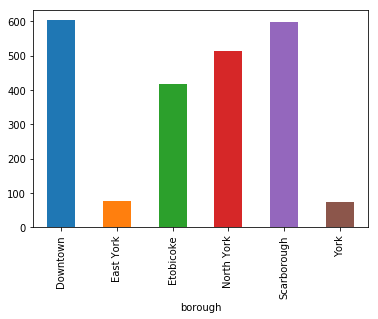

In [21]:
print(venues.groupby('borough').Venue.count())
venues.groupby('borough').Venue.count().plot(kind='bar')

# Check Neighborhoods

After selecting scarborough and North York, it is time to compaire their naighborhoods

Neighborhood
Armadale                   50
Milliken                   46
West Rouge                 39
Rouge                      34
Cliffside                  32
Golden Mile                26
Steeles                    26
Scarborough Village        26
Scarborough City Centre    25
Dorset Park                24
Name: Venue, dtype: int64


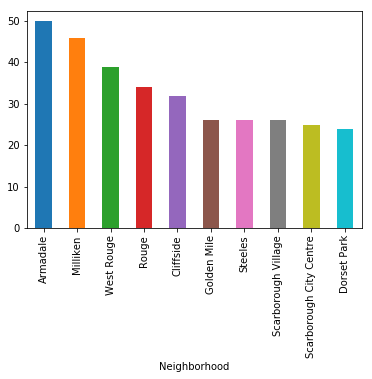

In [22]:
#Scarborough Neighborhood
scar_ven=venues.loc[venues.borough=='Scarborough',:].groupby(['Neighborhood']).Venue.count()
scar_ven.sort_values(ascending=False).head(10).plot(kind='bar')
print(scar_ven.sort_values(ascending=False).head(10))

Neighborhood
Humber Summit              55
Lawrence Heights           51
York University Heights    46
Newtonbrook                45
Henry Farm                 30
Don Mills                  29
Pelmo Park – Humberlea     20
North York City Centre     19
Hillcrest Village          18
Bayview Village            15
Name: Venue, dtype: int64


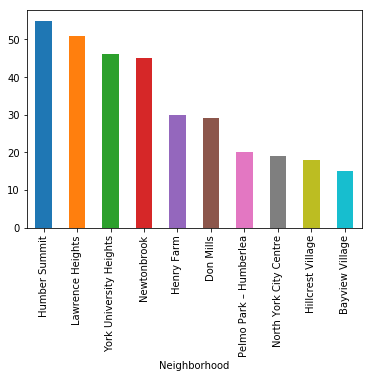

In [23]:
#North Yorks Neighborhood
north_ven=venues.loc[venues.borough=='North York',:].groupby(['Neighborhood']).Venue.count()
north_ven.sort_values(ascending=False).head(10).plot(kind='bar')
print(north_ven.sort_values(ascending=False).head(10))

Neighborhood
Humber Summit              55
Lawrence Heights           51
Armadale                   50
Milliken                   46
York University Heights    46
Newtonbrook                45
West Rouge                 39
Rouge                      34
Cliffside                  32
Henry Farm                 30
Name: Venue, dtype: int64


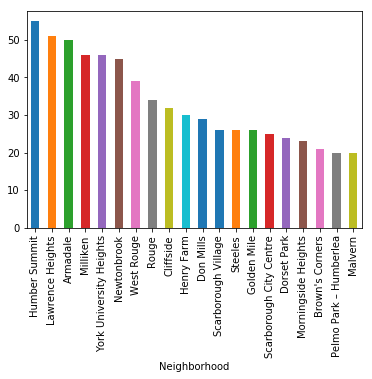

In [24]:
#Scarborough and North Yorks Neighborhood compration according to 
north_scar_ven=venues.loc[((venues.borough=='North York')|(venues.borough=='Scarborough')),:].groupby(['Neighborhood']).Venue.count()
north_scar_ven.sort_values(ascending=False).head(20).plot(kind='bar')
print(north_scar_ven.sort_values(ascending=False).head(10))

Neighborhood
Humber Summit              30
Newtonbrook                25
Milliken                   23
Armadale                   19
Henry Farm                 18
York University Heights    17
West Rouge                 16
Steeles                    14
Brown's Corners            14
Dorset Park                13
Name: Venue, dtype: int64


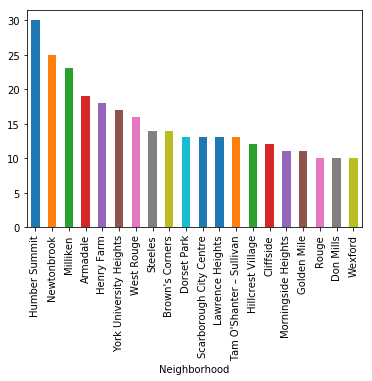

In [25]:
north_scar_ven=venues.loc[(((venues.borough=='North York')|(venues.borough=='Scarborough')) & (venues.VenCat=='eatery')),:].groupby(['Neighborhood']).Venue.count()
north_scar_ven.sort_values(ascending=False).head(20).plot(kind='bar')
print(north_scar_ven.sort_values(ascending=False).head(10))

# Italian Resturant

Checking for Italian Resturants "Humber Summit", "Lawrence Heights", "York University Heights", "Newtonbrook", "Henry Farm", "Don Mills"   

                         Italian Returants  Eateries
Don Mills                              1.0        10
Henry Farm                             1.0        18
Humber Summit                          5.0        30
Lawrence Heights                       NaN        13
Newtonbrook                            1.0        25
York University Heights                2.0        17


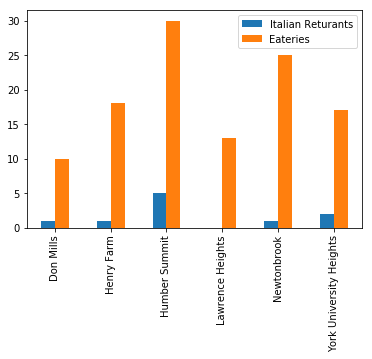

In [26]:
selected_naibor=venues[venues.Neighborhood.isin(["Humber Summit", "Lawrence Heights", "York University Heights", "Newtonbrook", "Henry Farm", "Don Mills"])]
selected_naibor1=selected_naibor.loc[(venues['Venue Category'].str.contains('Italian')&(venues.VenCat=='eatery')),:].groupby(['Neighborhood']).Venue.count()#.sort_values(ascending=False)
selected_naibor2=selected_naibor.loc[(venues.VenCat=='eatery'),:].groupby(['Neighborhood']).Venue.count()#.sort_values(ascending=False)
Total=pd.concat([selected_naibor1,selected_naibor2],axis=1,sort=True)
Total.columns=['Italian Returants','Eateries']
Total.plot(kind='bar')
print(Total)
# selected_naibor1

# Show on the map

In [27]:
def show_map(borogh,Dataframe):
    neighbor_resturants=venues[(Dataframe.Neighborhood==borogh)&(Dataframe.VenCat=='eatery')]
    neighbor_italian_resturants=neighbor_resturants.loc[(neighbor_resturants['Venue Category'].str.contains('Italian')),:]
    latitude, longitude=list(neighbor_resturants['Neighborhood Latitude'])[0],list(neighbor_resturants['Neighborhood Longitude'])[0]
    # create map of Manhattan using latitude and longitude values
    the_map = folium.Map(location=[latitude, longitude], zoom_start=14)
    # Show eateries in blue
    for lat, lng, label in zip(neighbor_resturants['Venue Latitude'], neighbor_resturants['Venue Longitude'], neighbor_resturants['Venue']+', '+neighbor_resturants['Venue Category']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(the_map) 
    # Show Italian resturants in blue
    # add markers to map
    try:
        for lat, lng, label in zip(neighbor_italian_resturants['Venue Latitude'], neighbor_italian_resturants['Venue Longitude'], neighbor_italian_resturants['Venue']+', '+neighbor_italian_resturants['Venue Category']):
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='red',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(the_map)
    except:
        pass

    return the_map

In [28]:
#show_map("Humber Summit",venues)
#show_map("Lawrence Heights",venues)
#show_map("York University Heights",venues)
show_map("Newtonbrook",venues)
#show_map("Henry Farm",venues)
#show_map("Don Mills",venues)
#show_map(latitude, longitude, neighbor_italian_resturants,'blue')

# Clustering naighbourhoods 

In [29]:
# Working on North York & Scarborough
north_scar_venues=venues.loc[((venues.borough=='North York')|(venues.borough=='Scarborough')),:]
north_scar_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,borough,VenCat
16863,Milliken,43.823217,-79.301523,0109 Dessert & Chocolate,43.814558,-79.294758,Dessert Shop,Scarborough,drink
15098,York University Heights,43.773760,-79.506041,168 Sushi Buffet Vaughan,43.787310,-79.471033,Sushi Restaurant,North York,eatery
17995,West Rouge,43.785963,-79.130756,7-Eleven,43.819731,-79.115210,Convenience Store,Scarborough,other
16719,Maryvale,43.759051,-79.310230,A&W Canada,43.766272,-79.301847,Fast Food Restaurant,Scarborough,eatery
15032,York University Heights,43.773760,-79.506041,A&W Canada,43.799560,-79.500457,Fast Food Restaurant,North York,eatery


## Prepare Data for Clustering

In [30]:
#Find most frequency venues
new_data=pd.DataFrame(north_scar_venues.groupby('Neighborhood')['Venue Category'].value_counts(normalize=True))
# Flatten the group
new_data=new_data.unstack()
# Filter dataframe for limited naighbourhoods
new_data=new_data.loc[["Humber Summit","Lawrence Heights","York University Heights","Newtonbrook","Henry Farm","Don Mills"],:]
# Remove columns without value
new_data=new_data.dropna(axis=1,how='all')
# Remove multy level columns
new_data.columns = [col[1] for col in new_data.columns]
# Round the numbers
new_data=new_data.round(3)
new_data.replace(np.nan,0,inplace=True)
new_data.head()

,ATM,American Restaurant,Arts & Crafts Store,Asian Restaurant,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Store,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant,Electronics Store,Fast Food Restaurant,Food Court,Fried Chicken Joint,Furniture / Home Store,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kitchen Supply Store,Korean Restaurant,Liquor Store,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Music Store,Music Venue,Nightclub,Other Great Outdoors,Other Nightlife,Outdoor Supply Store,Park,Persian Restaurant,Pharmacy,Pizza Place,Poutine Place,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,Smoothie Shop,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Toy / Game Store,Track,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wings Joint,Women's Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Humber Summit,0.018,0.018,0.00,0.000,0.000,0.018,0.000,0.018,0.018,0.018,0.018,0.018,0.000,0.000,0.018,0.073,0.000,0.000,0.000,0.0,0.000,0.000,0.018,0.0,0.000,0.073,0.000,0.00,0.000,0.000,0.018,0.018,0.000,0.000,0.00,0.055,0.000,0.000,0.018,0.018,0.0,0.00,0.018,0.000,0.0,0.000,0.000,0.000,0.036,0.036,0.018,0.091,0.018,0.00,0.00,0.000,0.018,0.000,0.000,0.00,0.018,0.000,0.018,0.000,0.018,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.055,0.000,0.036,0.000,0.00,0.018,0.000,0.018,0.018,0.055,0.000,0.036,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.00
Lawrence Heights,0.000,0.020,0.02,0.000,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.020,0.039,0.000,0.000,0.020,0.000,0.020,0.020,0.0,0.000,0.000,0.000,0.0,0.157,0.020,0.000,0.02,0.020,0.020,0.039,0.000,0.000,0.000,0.02,0.020,0.020,0.039,0.020,0.000,0.0,0.02,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.02,0.02,0.000,0.020,0.000,0.020,0.02,0.000,0.000,0.020,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.020,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.02,0.000,0.000,0.039,0.000,0.000,0.000,0.020,0.020,0.000,0.000,0.039,0.000,0.039,0.000,0.02,0.020,0.02,0.000,0.02
York University Heights,0.000,0.000,0.00,0.022,0.000,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.000,0.0,0.000,0.022,0.000,0.0,0.000,0.043,0.022,0.00,0.000,0.000,0.000,0.043,0.022,0.000,0.00,0.022,0.022,0.000,0.043,0.000,0.0,0.00,0.022,0.043,0.0,0.000,0.022,0.000,0.087,0.000,0.000,0.043,0.000,0.00,0.00,0.000,0.022,0.022,0.000,0.00,0.000,0.022,0.000,0.022,0.000,0.022,0.0,0.022,0.022,0.000,0.000,0.000,0.022,0.000,0.022,0.043,0.000,0.000,0.000,0.00,0.022,0.022,0.022,0.000,0.000,0.000,0.043,0.000,0.043,0.022,0.000,0.022,0.000,0.000,0.00,0.000,0.00,0.043,0.00
Newtonbrook,0.000,0.000,0.00,0.022,0.022,0.000,0.044,0.022,0.000,0.000,0.000,0.022,0.000,0.022,0.000,0.022,0.000,0.022,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.111,0.000,0.00,0.022,0.000,0.022,0.000,0.000,0.022,0.00,0.022,0.000,0.000,0.022,0.000,0.0,0.00,0.022,0.000,0.0,0.022,0.000,0.022,0.000,0.000,0.000,0.022,0.044,0.00,0.00,0.178,0.022,0.000,0.000,0.00,0.000,0.089,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.022,0.00,0.000,0.000,0.000,0.000,0.000,0.022,0.022,0.000,0.000,0.000,0.022,0.000,0.000,0.022,0.00,0.022,0.00,0.000,0.00
Henry Farm,0.000,0.000,0.00,0.033,0.000,0.000,0.033,0.033,0.000,0.000,0.000,0.000,0.00

## Machine learning (K-Mean Clustering)

In [31]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(new_data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:99] 
new_data['Cluster Labels'] = kmeans.labels_
newcolumns=[new_data.columns[-1]]+list(new_data.columns[:-1])
new_data=new_data[newcolumns]
new_data.head()

,Cluster Labels,ATM,American Restaurant,Arts & Crafts Store,Asian Restaurant,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Store,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant,Electronics Store,Fast Food Restaurant,Food Court,Fried Chicken Joint,Furniture / Home Store,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kitchen Supply Store,Korean Restaurant,Liquor Store,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Music Store,Music Venue,Nightclub,Other Great Outdoors,Other Nightlife,Outdoor Supply Store,Park,Persian Restaurant,Pharmacy,Pizza Place,Poutine Place,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,Smoothie Shop,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Toy / Game Store,Track,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wings Joint,Women's Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Humber Summit,3,0.018,0.018,0.00,0.000,0.000,0.018,0.000,0.018,0.018,0.018,0.018,0.018,0.000,0.000,0.018,0.073,0.000,0.000,0.000,0.0,0.000,0.000,0.018,0.0,0.000,0.073,0.000,0.00,0.000,0.000,0.018,0.018,0.000,0.000,0.00,0.055,0.000,0.000,0.018,0.018,0.0,0.00,0.018,0.000,0.0,0.000,0.000,0.000,0.036,0.036,0.018,0.091,0.018,0.00,0.00,0.000,0.018,0.000,0.000,0.00,0.018,0.000,0.018,0.000,0.018,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.055,0.000,0.036,0.000,0.00,0.018,0.000,0.018,0.018,0.055,0.000,0.036,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.00
Lawrence Heights,2,0.000,0.020,0.02,0.000,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.020,0.039,0.000,0.000,0.020,0.000,0.020,0.020,0.0,0.000,0.000,0.000,0.0,0.157,0.020,0.000,0.02,0.020,0.020,0.039,0.000,0.000,0.000,0.02,0.020,0.020,0.039,0.020,0.000,0.0,0.02,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.02,0.02,0.000,0.020,0.000,0.020,0.02,0.000,0.000,0.020,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.020,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.02,0.000,0.000,0.039,0.000,0.000,0.000,0.020,0.020,0.000,0.000,0.039,0.000,0.039,0.000,0.02,0.020,0.02,0.000,0.02
York University Heights,3,0.000,0.000,0.00,0.022,0.000,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.000,0.0,0.000,0.022,0.000,0.0,0.000,0.043,0.022,0.00,0.000,0.000,0.000,0.043,0.022,0.000,0.00,0.022,0.022,0.000,0.043,0.000,0.0,0.00,0.022,0.043,0.0,0.000,0.022,0.000,0.087,0.000,0.000,0.043,0.000,0.00,0.00,0.000,0.022,0.022,0.000,0.00,0.000,0.022,0.000,0.022,0.000,0.022,0.0,0.022,0.022,0.000,0.000,0.000,0.022,0.000,0.022,0.043,0.000,0.000,0.000,0.00,0.022,0.022,0.022,0.000,0.000,0.000,0.043,0.000,0.043,0.022,0.000,0.022,0.000,0.000,0.00,0.000,0.00,0.043,0.00
Newtonbrook,1,0.000,0.000,0.00,0.022,0.022,0.000,0.044,0.022,0.000,0.000,0.000,0.022,0.000,0.022,0.000,0.022,0.000,0.022,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.111,0.000,0.00,0.022,0.000,0.022,0.000,0.000,0.022,0.00,0.022,0.000,0.000,0.022,0.000,0.0,0.00,0.022,0.000,0.0,0.022,0.000,0.022,0.000,0.000,0.000,0.022,0.044,0.00,0.00,0.178,0.022,0.000,0.000,0.00,0.000,0.089,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.022,0.00,0.000,0.000,0.000,0.000,0.000,0.022,0.022,0.000,0.000,0.000,0.022,0.000,0.000,0.022,0.00,0.022,0.00,0.000,0.00
Henry Farm,0,0.000,0.000,0.00,0.033,0.000,0.000,0.033,0.033,0.

Based on the clustering York University and Humber Summit are at the same Group (Group 3)

In [32]:
show_map("York University Heights",venues)

In [449]:
show_map("Humber Summit",venues)

# Final Result

York University Heights is the best neighborhood to start an Italian Restaurants among the neighborhoods of North York and Scarborough. The major factors that worked in favor of York University Heights are the absence of Italian restaurants in it even though it has the most number of restaurants in Manhattan, wide spread of the cuisines offered by the restaurants located in it.
